In [79]:
import numpy as np
import matplotlib.pyplot as plt

## Laplacian of Gaussian
The Laplacian of Gaussian (LoG) is the second derivative of the Gaussian function

Gaussian function: $G_\sigma = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{x^2}{2\sigma^2} }$ 

LoG: $\nabla^2 G_\sigma = \frac{\partial^2 f}{\partial x^2}$

In [115]:
def laplacian_of_gaussian(sigma, size):
    # todo: compute the laplacian of gaussian np.arange(-5,5)
    gaussian = np.exp(-np.arange(-size // 2 + 1, size // 2 + 1)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    laplacian = np.diff(gaussian, n=2) 
    return laplacian

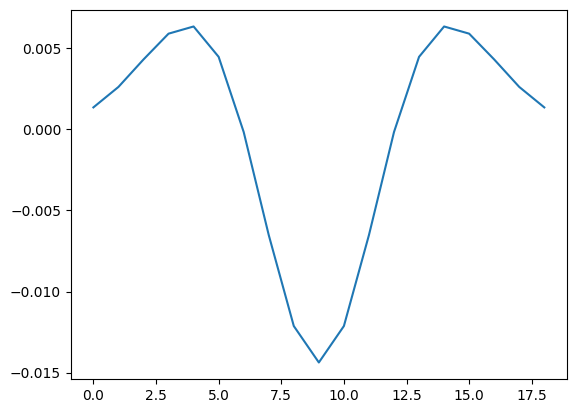

In [116]:
log = laplacian_of_gaussian(3, 21)
plt.plot(log)

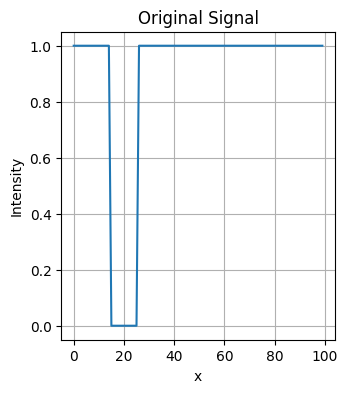

In [173]:
# Create a 1D blob signal
blob_size = 10
blob_center = 20
signal_length = 100
signal = np.ones(signal_length)
signal[blob_center - blob_size // 2:blob_center + blob_size // 2 + 1] = 0
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(signal)
plt.title("Original Signal")
plt.xlabel("x")
plt.ylabel("Intensity")
plt.grid(True)

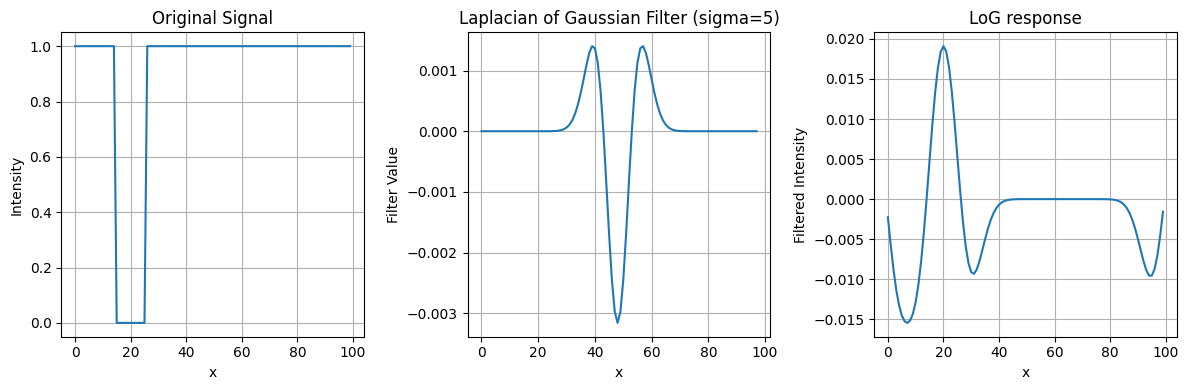

In [174]:
# Apply the LoG to the above signal at various sigma values and plot the result.
# use np.convolve
sigma = 5
size = signal_length
log_filter = laplacian_of_gaussian(sigma, size)
filtered_signal = np.convolve(signal, log_filter, mode='same')

# Plot the original signal, the LoG filter, and the filtered signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(signal)
plt.title("Original Signal")
plt.xlabel("x")
plt.ylabel("Intensity")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(log_filter)
plt.title(f"Laplacian of Gaussian Filter (sigma={sigma})")
plt.xlabel("x")
plt.ylabel("Filter Value")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(filtered_signal)
plt.title("LoG response")
plt.xlabel("x")
plt.ylabel("Filtered Intensity")
plt.grid(True)

plt.tight_layout()
plt.show()

In [175]:
# Apply LoG at various sigma values and plot the response values at blob center against various sigma values


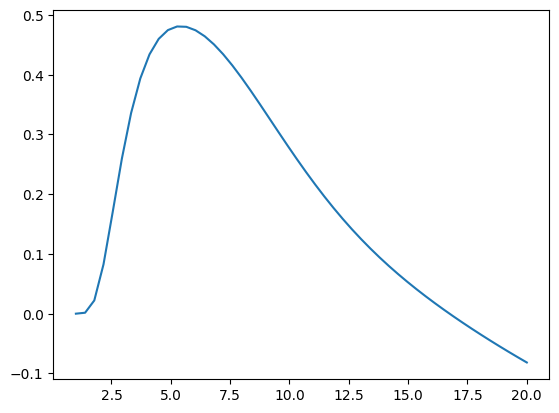

In [176]:
response = []
sigmas = np.linspace(1,20)
for sigma in sigmas:
    log = sigma**2 * laplacian_of_gaussian(sigma, signal_length) # multiplying with sigma**2 to normalize the response
    filtered_signal = np.convolve(signal, log, mode='same')
    response.append(filtered_signal[20])
plt.plot(sigmas, response)